<a href="https://colab.research.google.com/github/mequanent/Audio-Processing/blob/main/Audio_Processing_Beginner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
pip install librosa -q

# Libraries, common to all sections

In [11]:
import numpy as np
import librosa
import librosa.display # unless imported will be error

# **Begin with beat tracking**

In [ ]:
y # one dimensional array of size 2643264
sr # 22050 Sampling rate
beat_frames # size 212
tempo # 107.666015625
beat_times.size # size 212

(212,)

In [ ]:
# Beat tracking example

# 1. Get the file path to an included audio example
filename = librosa.example('nutcracker')


# 2. Load the audio as a waveform `y`
#    Store the sampling rate as `sr`
y, sr = librosa.load(filename)

# 3. Run the default beat tracker
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

# 4. Convert the frame indices of beat events into timestamps
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

Estimated tempo: 107.67 beats per minute


In [ ]:
# Feature extraction example

# Load the example clip
y, sr = librosa.load(librosa.ex('nutcracker'))

# Set the hop length; at 22050 Hz, 512 samples ~= 23ms
hop_length = 512

# Separate harmonics and percussives into two waveforms
y_harmonic, y_percussive = librosa.effects.hpss(y)

# Beat track on the percussive signal # 107.666015625 , 211 respectively
tempo, beat_frames = librosa.beat.beat_track(y=y_percussive, sr=sr)

# Compute MFCC features from the raw signal # (13, 5163)
mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=13)

# And the first-order differences (delta features) # (13, 5163)
mfcc_delta = librosa.feature.delta(mfcc)

# Stack and synchronize between beat events
# This time, we'll use the mean value (default) instead of median # (26, 212)
beat_mfcc_delta = librosa.util.sync(np.vstack([mfcc, mfcc_delta]), beat_frames)

# Compute chroma features from the harmonic signal # (12, 5163)
chromagram = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr)

# Aggregate chroma features between beat events
# We'll use the median value of each feature between beat frames # (12, 212)
beat_chroma = librosa.util.sync(chromagram, beat_frames, aggregate=np.median)

# Finally, stack all beat-synchronous features together # (38, 212)
beat_features = np.vstack([beat_chroma, beat_mfcc_delta])

array([ 2.2716861e-06,  5.3327208e-06, -7.2473290e-06, ...,
        1.1170751e-05,  1.2871889e-06,  5.4120628e-06], dtype=float32)

In [ ]:
# Finally, stack all beat-synchronous features together # (38, 212)
beat_features = np.vstack([beat_chroma, beat_mfcc_delta])
beat_features

array([[ 0.30254456,  0.0334522 ,  0.1058374 , ...,  0.15276003,
         0.07555082,  0.0814149 ],
       [ 0.25782844,  0.04074808,  0.08428392, ...,  0.09633808,
         0.12807782,  0.0932549 ],
       [ 0.3997867 ,  0.0575659 ,  0.09429981, ...,  0.44611084,
         0.186589  ,  0.13245766],
       ...,
       [-0.06548901, -0.14644985,  0.05339273, ..., -0.16999006,
         0.62217766,  0.12908453],
       [-0.02321963, -0.13737966, -0.01143883, ..., -0.24983512,
         0.2491345 ,  0.00830472],
       [ 0.02864804, -0.20102443, -0.05542237, ...,  0.07502007,
        -0.61561984,  0.07628296]], dtype=float32)

In [ ]:
beat_features.shape

(38, 212)

# **STFT**

In [16]:
filename = "22.mp3"
y, sr = librosa.load(filename)
#y, sr = librosa.load(librosa.ex('trumpet'))
S = np.abs(librosa.stft(y))
S

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


array([[2.19812930e-01, 3.23657066e-01, 9.93710086e-02, ...,
        1.24013787e-02, 8.15307274e-02, 3.99422683e-02],
       [7.71944448e-02, 4.01091129e-01, 5.41020632e-01, ...,
        3.72832827e-02, 1.20274186e-01, 1.79564402e-01],
       [1.43177927e-01, 4.37012225e-01, 4.88177061e-01, ...,
        2.65344709e-01, 3.52596730e-01, 1.81859568e-01],
       ...,
       [5.56500254e-06, 1.35913169e-05, 2.62466583e-05, ...,
        4.24403006e-05, 8.99676088e-05, 1.22138867e-04],
       [5.04979425e-06, 2.46590862e-05, 4.12857662e-05, ...,
        3.54269214e-05, 5.44076865e-05, 7.22100303e-05],
       [7.58590886e-06, 2.83949557e-05, 3.09058996e-05, ...,
        4.96458415e-05, 8.95880221e-05, 1.16027972e-04]], dtype=float32)

In [5]:
librosa.stft(y)

array([[ 5.3953640e-03+0.0000000e+00j,  3.3315693e-03+0.0000000e+00j,
         1.0328183e-03+0.0000000e+00j, ...,
        -2.2926326e-08+0.0000000e+00j, -9.8623946e-07+0.0000000e+00j,
        -1.2011992e-05+0.0000000e+00j],
       [-3.2442170e-03+1.0905041e-16j, -2.0856131e-03-1.6995450e-03j,
         4.1004395e-04-9.7987743e-04j, ...,
         2.2314891e-08-1.0865124e-08j, -8.4434276e-07-4.4319779e-07j,
         5.6695230e-06-1.0585724e-05j],
       [ 2.3986856e-03+4.8088347e-16j, -1.1003844e-04-7.6366746e-04j,
        -1.5042156e-03+4.5130032e-04j, ...,
        -1.6460707e-08+1.9884789e-08j, -5.1679814e-07-8.2035064e-07j,
         6.6507264e-06+9.9771005e-06j],
       ...,
       [-7.4183219e-05+2.9855370e-17j,  3.6273192e-05-9.6701271e-08j,
        -3.1608189e-07-1.1939948e-06j, ...,
        -1.4079569e-04+3.0413884e-04j, -2.9501939e-04-6.4467202e-04j,
         6.1960815e-04+5.4164545e-04j],
       [ 7.5229633e-05-3.6843223e-16j,  1.0368310e-06-3.7209669e-05j,
         1.3524847e-06

In [17]:
S_left = librosa.stft(y, center=False)
S_left

array([[ 9.9371009e-02+0.0000000e+00j,  8.6228234e-01+0.0000000e+00j,
         1.1258403e+00+0.0000000e+00j, ...,
        -1.6869275e-02+0.0000000e+00j, -4.6836648e-02+0.0000000e+00j,
         1.2401379e-02+0.0000000e+00j],
       [-5.1120754e-02+5.3860003e-01j, -4.8581904e-01+2.1784711e-01j,
        -6.7719990e-01+2.6466383e-02j, ...,
        -1.2468110e-01-5.3771153e-02j,  1.3528131e-01+2.8968601e-02j,
        -2.7350308e-03+3.7182830e-02j],
       [ 1.7479534e-01-4.5581073e-01j, -1.1930564e-01+2.4017086e-02j,
         1.5759254e-01+4.6119254e-02j, ...,
         2.9351136e-01+1.1163463e-01j, -2.4767439e-01-1.3770017e-01j,
         5.8325931e-02+2.5885499e-01j],
       ...,
       [ 2.6224938e-05+1.0675739e-06j, -3.3733355e-05-2.7546610e-05j,
         2.4707166e-05+2.0031301e-05j, ...,
        -9.8097162e-06-3.1210882e-06j,  2.0102370e-06-6.7653809e-06j,
         4.2434451e-05+7.0461635e-07j],
       [-3.7233229e-05+1.7838192e-05j,  2.9223909e-05+2.8621675e-05j,
         1.0123332e-05

In [18]:
D_short = librosa.stft(y, hop_length=64)
D_short

array([[-2.19812930e-01+0.00000000e+00j, -2.31205702e-01+0.00000000e+00j,
        -2.49867976e-01+0.00000000e+00j, ...,
        -4.44281213e-02+0.00000000e+00j, -4.40080985e-02+0.00000000e+00j,
        -4.24136892e-02+0.00000000e+00j],
       [-7.71944448e-02-1.09775470e-18j, -7.41046369e-02-7.39693344e-02j,
        -4.92715426e-02-1.46563441e-01j, ...,
         1.40296638e-01-1.17661931e-01j,  1.76795438e-01-6.36629835e-02j,
         1.90877572e-01+1.04110257e-03j],
       [ 1.43177927e-01-1.25132343e-17j,  1.43187314e-01+1.02082705e-02j,
         1.58309042e-01+2.52249148e-02j, ...,
        -1.29478231e-01-2.32746452e-02j, -7.52896816e-02-2.89760679e-02j,
        -5.18671460e-02+5.63761918e-04j],
       ...,
       [-5.56500254e-06-1.04718518e-17j, -5.83912788e-06-1.80092513e-07j,
        -6.75089950e-06-7.15544530e-08j, ...,
        -6.68068824e-05-1.05562009e-04j, -1.11032154e-04-6.05492278e-05j,
        -1.26871761e-04+1.00469765e-06j],
       [ 5.04979425e-06-2.65222956e-17j,  4.

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

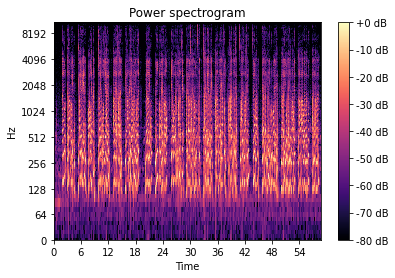

In [19]:
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

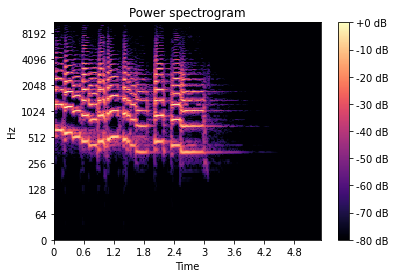

In [14]:
# From original sound

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


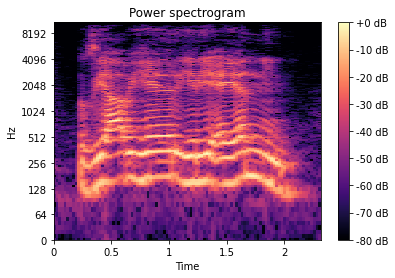

In [21]:

filename = "22_one_sentence.mp3"
y, sr = librosa.load(filename)
#y, sr = librosa.load(librosa.ex('trumpet'))
S = np.abs(librosa.stft(y))
S_left = librosa.stft(y, center=False)
D_short = librosa.stft(y, hop_length=64)

fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

# **End of Audio Tutorial**

# **Python Programming**

In [1]:
# type conversion
first = float(input("Enter the first number: "))
second = float(input("Enter the first number: "))
sum = first + second
print("The sum is: ", sum)

Enter the first number: 20.5
Enter the first number: 21.3
The sum is:  41.8


In [3]:
# String formats/ styles
course = "Python for Beginners"
print(course.upper())
print(course.lower())
print(course)
print(course.replace('for', '4'))
print(course.find('Python')) # returns the starting index of the substring
print('Python' in course) # Returns boolean value

PYTHON FOR BEGINNERS
python for beginners
Python for Beginners
Python 4 Beginners
0
True


In [7]:
# Operators
print(10 / 3) # float division
print(10 // 3) # nearest integer 
print(10 * 3) # multiplication
print(10 ** 3) # exponent
x = 10 
x += 3
print(x)

3.3333333333333335
3
30
1000
13


In [9]:
# Logical Operators
price = 25
print(price > 10 and price < 30) # Check if a value is in a range
print(price > 10 or price < 30)
print(not price > 10)

True
True
False


In [11]:
# 
temperature = 35
if temperature > 30:
  print("It's a hot day.") # The quote must be double to avoid confusion with It's
print('Done!')

It's a hot day.
Done!
